# Heatmaps

## july package demo

In [2]:
# https://stackoverflow.com/a/67817742
#https://github.com/e-hulten/july
!pip install july

In [145]:
import numpy as np
import july
from july.utils import date_range

dates = date_range("2020-01-01", "2020-12-31")
data = np.random.randint(0, 14, len(dates))

<AxesSubplot:title={'center':'Github Activity'}>

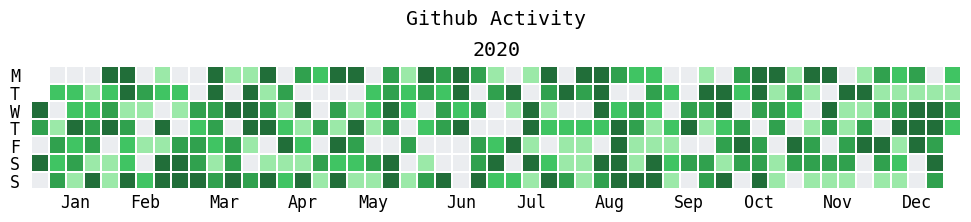

In [6]:
july.heatmap(dates, data, title='Github Activity', cmap="github")

## calplot demo

In [95]:
#https://calplot.readthedocs.io/en/latest/
pip install calplot

Note: you may need to restart the kernel to use updated packages.


In [320]:
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import calplot

all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

In [109]:
events

2020-07-27    0.177954
2019-06-16    0.860401
2019-11-03   -1.058042
2019-12-27    0.169200
2019-12-27    1.368074
                ...   
2019-11-05    0.959122
2020-09-07    0.206982
2020-03-15    0.419696
2020-04-26    0.041664
2019-01-30   -0.071506
Length: 500, dtype: float64

(<Figure size 4000x1360 with 2 Axes>,
 array([<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>],
       dtype=object))

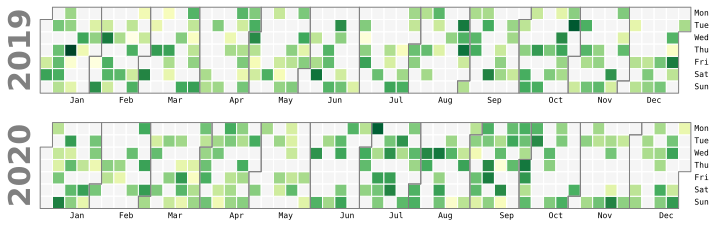

In [99]:
calplot.calplot(events, cmap='YlGn', colorbar=False)

## Daily Heatmap for 2019

### preparing 2019 daily MTA data

In [146]:
import pandas as pd

In [147]:
daily_data=pd.read_csv('mta_2019_daily.csv',sep='\t', parse_dates=['DATE'])

In [148]:
daily_data.head()

,DATE,DAILY_ENTRIES
0,2019-01-01,2381036.0
1,2019-01-02,5313508.0
2,2019-01-03,5708684.0
3,2019-01-04,5580026.0
4,2019-01-05,2880013.0


In [149]:
from matplotlib.pyplot import figure


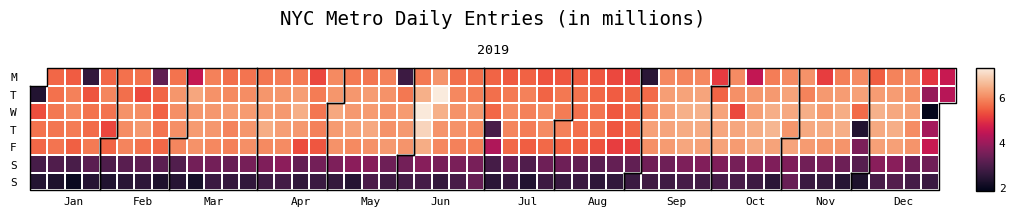

In [439]:
#heatmap using july
year_heatmap=july.heatmap(daily_data.DATE, daily_data.DAILY_ENTRIES.apply(lambda x: x/1000000), 
             title='NYC Metro Daily Entries (in millions)',
             #horizontal=False,
             #value_label=True,
             #date_label=True,
             weekday_label=True,
             month_label=True, 
             year_label=True,
             colorbar=True,
             fontfamily="monospace",
             fontsize=8,
             titlesize='xx-large',
             #dpi=400,
             cmap="rocket",
             month_grid=True,
             )

In [454]:
year_heatmap.figure.savefig("year_heatmap.png", dpi=500)

In [322]:
#heatmap using calplot
daily_data_series=pd.Series(daily_data['DAILY_ENTRIES'].values , index=daily_data['DATE'])

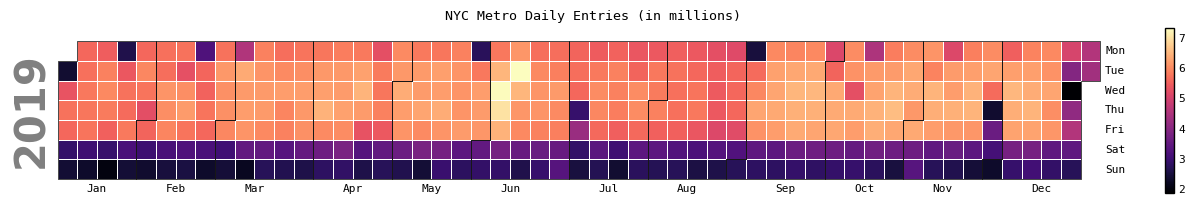

In [453]:
calplot.calplot(daily_data_series.apply(lambda x: x/1000000),
                cmap='magma',
                colorbar=True,
                suptitle='NYC Metro Daily Entries (in millions)',
                linewidth=0.5,
                figsize=(14,2),
                edgecolor='black',
                monthlabeloffset=9,
                #monthticks=False
               )
plt.savefig('yearlyheatmap.png', dpi=1200)

### Line plot to inspect the peaks in June

In [162]:
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [36]:
import datetime
from matplotlib.ticker import FuncFormatter

(0.0, 8000000.0)

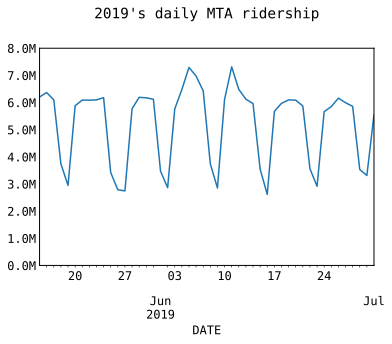

In [43]:
def millions_formatter(x, pos):
    return f'{x / 1000000}M'

fig=daily_data.plot(x="DATE", y="DAILY_ENTRIES",
                   legend=None)
plt.title('2019\'s daily MTA ridership')

plt.xlim([datetime.date(2019, 5, 15), datetime.date(2019, 7, 1)])
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylim([0, 8000000])

## Weekly heatmap of 2019

### Cleaning data for weekly heatmap

In [196]:
import pandas as pd

In [339]:
mta_data=pd.read_csv('mta_data_2019.csv')

In [344]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,03:00:00,RECOVR AUD,7348000,2490989,2020-01-18 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,07:00:00,RECOVR AUD,7348009,2491000,2020-01-18 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,11:00:00,REGULAR,7348056,2491089,2020-01-18 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,15:00:00,REGULAR,7348214,2491154,2020-01-18 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,19:00:00,REGULAR,7348509,2491203,2020-01-18 19:00:00


In [199]:
import datetime

In [340]:
#combine date and time into a new column data_time
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [345]:
mta_data["DATE"] = pd.to_datetime(mta_data.DATE)

In [369]:
mta_data.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE         datetime64[ns]
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATE_TIME    datetime64[ns]
dtype: object

In [359]:
holidays=['2019-01-01',
'2019-01-21',
'2019-02-18',
'2019-05-27',
'2019-07-04',
'2019-09-02',
'2019-10-14',
'2019-11-11',
'2019-11-28',
'2019-12-25']

In [361]:
holidays

['2019-01-01',
 '2019-01-21',
 '2019-02-18',
 '2019-05-27',
 '2019-07-04',
 '2019-09-02',
 '2019-10-14',
 '2019-11-11',
 '2019-11-28',
 '2019-12-25']

In [376]:
#only select data from year 2019, and from 12/31/2018 for calculating 4hourly entry gain, remove holidays
#remove holidays
#mta_data=mta_data[(mta_data['DATE_TIME'].dt.year == 2019) | (mta_data['DATE']=='2018-12-31') | (~mta_data['DATE'].isin(holidays))]
mta_data=mta_data.query('((DATE_TIME.dt.year == 2019) | (DATE=="2018-12-31")) & (DATE not in @holidays)')

In [383]:
#sanity check
mta_data[mta_data.DATE=='2019-12-25']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


In [379]:
mta_data.sort_values('DATE')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
11334529,K025,R404,00-00-03,FRESH POND RD,M,BMT,2018-12-31,00:00:00,REGULAR,682511,597985,2018-12-31 00:00:00
11407971,PTH04,R551,00-00-01,GROVE STREET,1,PTH,2018-12-31,04:34:35,REGULAR,91957,94523,2018-12-31 04:34:35
11351763,N094,R029,01-00-00,WORLD TRADE CTR,ACE23,IND,2018-12-31,23:00:00,REGULAR,440600,661647,2018-12-31 23:00:00
11351762,N094,R029,01-00-00,WORLD TRADE CTR,ACE23,IND,2018-12-31,19:00:00,REGULAR,440495,661501,2018-12-31 19:00:00
11351761,N094,R029,01-00-00,WORLD TRADE CTR,ACE23,IND,2018-12-31,15:00:00,REGULAR,440143,661062,2018-12-31 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
800918,R509,R121,00-00-02,QUEENSBORO PLZ,7NQW,IRT,2019-12-31,19:00:00,REGULAR,2098703,546532,2019-12-31 19:00:00
706159,N340,R115,00-00-00,169 ST,F,IND,2019-12-31,23:00:00,REGULAR,3183294,921198,2019-12-31 23:00:00
660341,N002A,R173,00-05-01,INWOOD-207 ST,A,IND,2019-12-31,00:00:00,REGULAR,0,607,2019-12-31 00:00:00
660300,N002A,R173,00-05-00,INWOOD-207 ST,A,IND,2019-12-31,04:00:00,REGULAR,4326,0,2019-12-31 04:00:00


In [592]:
#checking for weird timestamps due to daylight saving
mta_data.TIME.value_counts().head(30)

04:00:00    801075
16:00:00    800936
08:00:00    800844
00:00:00    800777
20:00:00    800676
12:00:00    800667
01:00:00    441587
09:00:00    441567
21:00:00    441498
17:00:00    441486
05:00:00    441480
13:00:00    441439
07:00:00    310888
19:00:00    310789
15:00:00    310777
11:00:00    310714
03:00:00    310713
23:00:00    310490
10:00:00     30877
18:00:00     30875
14:00:00     30859
22:00:00     30842
06:00:00     30760
02:00:00     30696
12:22:00      8654
08:22:00      8645
20:22:00      8642
16:22:00      8634
04:22:00      8622
00:22:00      8622
Name: TIME, dtype: int64

In [589]:
#sanity check
temp=mta_data[(mta_data.TIME=='07:00:00')].DATE.value_counts().reset_index()

In [590]:
temp.set_index('index',inplace=True)

<Figure size 700x700 with 0 Axes>

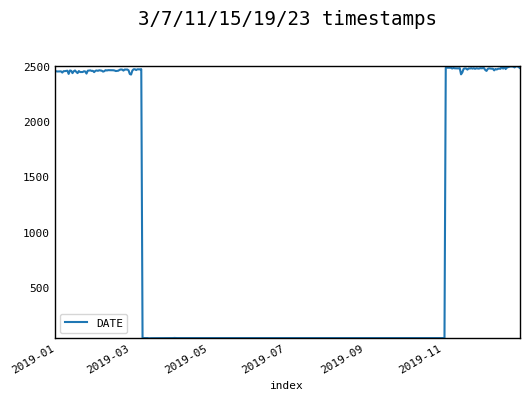

In [591]:
#checking for weird timestamps due to daylight saving
plt.figure(figsize = (7, 7))
fig3=temp.plot()
fig3.set_title('3/7/11/15/19/23 timestamps')
#fig3.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
#fig3.set_ylim([0, 80])
plt.savefig('daylightsaving2.png', dpi=500,bbox_inches='tight')

In [612]:
#inspect if 3/7/11/15/19/23 can be consolidated with 0/4/8/12/16/20 times
mta_data[(mta_data.TIME=='07:00:00')|(mta_data.TIME=='08:00:00')].groupby(['STATION','TIME']).TIME.count().tail(20)
#can't fully consolidate...
#discarding timestamps that are not 0/4/8/12/16/20
#heatmap will be heavily skewed towards summer

STATION          TIME    
WALL ST          07:00:00    2673
                 08:00:00    5142
WEST FARMS SQ    08:00:00    1095
WESTCHESTER SQ   07:00:00     366
                 08:00:00     699
WHITEHALL S-FRY  08:00:00    1821
WHITLOCK AV      07:00:00     732
                 08:00:00    1398
WILSON AV        07:00:00     610
                 08:00:00    1169
WINTHROP ST      08:00:00     488
WOODHAVEN BLVD   07:00:00     966
                 08:00:00    3150
WOODLAWN         07:00:00     610
                 08:00:00    1169
WORLD TRADE CTR  07:00:00    2176
                 08:00:00    4139
WTC-CORTLANDT    08:00:00    4260
YORK ST          08:00:00     366
ZEREGA AV        08:00:00     731
Name: TIME, dtype: int64

In [385]:
# Get rid of the duplicate entry
mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [386]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-31 03:00:00,1
6959396,R139,R031,04-00-00,34 ST-PENN STA,2019-08-05 20:00:00,1
6959389,R139,R031,04-00-00,34 ST-PENN STA,2019-08-04 16:00:00,1
6959390,R139,R031,04-00-00,34 ST-PENN STA,2019-08-04 20:00:00,1
6959391,R139,R031,04-00-00,34 ST-PENN STA,2019-08-05 00:00:00,1


In [387]:
mta_data = mta_data.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [456]:
mta_data_4hourly=mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], ascending=True)

In [457]:
#finding 4hourly gain in entries for each SCP
#mta_data_4hourly[["PREV_4HOUR", "PREV_ENTRIES"]] = (mta_data_4hourly.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].apply(lambda grp: grp.shift(1))) #.apply() may not be needed here
mta_data_4hourly[["PREV_4HOUR", "PREV_ENTRIES"]] = (mta_data_4hourly.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].shift(1))

<ipython-input-457-6749eb9382a2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_data_4hourly[["PREV_4HOUR", "PREV_ENTRIES"]] = (mta_data_4hourly.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].shift(1))


In [458]:
mta_data_4hourly

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,PREV_4HOUR,PREV_ENTRIES
11293598,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-31,03:00:00,6890934,2018-12-31 03:00:00,NaT,NaN
11293599,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-31,07:00:00,6890942,2018-12-31 07:00:00,2018-12-31 03:00:00,6890934.0
11293600,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-31,11:00:00,6891018,2018-12-31 11:00:00,2018-12-31 07:00:00,6890942.0
11293601,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-31,15:00:00,6891359,2018-12-31 15:00:00,2018-12-31 11:00:00,6891018.0
11293602,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-31,19:00:00,6891815,2018-12-31 19:00:00,2018-12-31 15:00:00,6891359.0
...,...,...,...,...,...,...,...,...,...,...,...,...
823271,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-31,04:00:00,5554,2019-12-31 04:00:00,2019-12-31 00:00:00,5554.0
823272,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-31,08:00:00,5554,2019-12-31 08:00:00,2019-12-31 04:00:00,5554.0
823273,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-31,12:00:00,5554,2019-12-31 12:00:00,2019-12-31 08:00:00,5554.0
823274,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-12-31,16:00:00,5554,2019-12-31 16:00:00,2019-12-31 12:00:00,5554.0


In [459]:
#remove 2018 entries
mta_data_4hourly=mta_data_4hourly[mta_data_4hourly['DATE_TIME'].dt.year==2019]

In [460]:
mta_data_4hourly

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,PREV_4HOUR,PREV_ENTRIES
11362829,N186,R418,00-05-01,BEACH 105 ST,AS,IND,2019-01-02,00:00:00,117440512,2019-01-02 00:00:00,2018-12-31 20:00:00,117440512.0
11476066,R521,R327,00-00-01,52 ST,7,IRT,2019-01-02,00:00:00,8641210,2019-01-02 00:00:00,2018-12-31 20:00:00,8640694.0
11302047,A049,R088,02-00-00,CORTLANDT ST,RNW,BMT,2019-01-02,00:00:00,700131,2019-01-02 00:00:00,2018-12-31 20:00:00,699678.0
11490743,R637,R451,00-00-01,WINTHROP ST,25,IRT,2019-01-02,00:00:00,1445999,2019-01-02 00:00:00,2018-12-31 20:00:00,1445364.0
11320153,E001,R368,00-05-01,9 AV,D,BMT,2019-01-02,00:00:00,524288,2019-01-02 00:00:00,2018-12-31 20:00:00,524288.0
...,...,...,...,...,...,...,...,...,...,...,...,...
741067,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,2019-12-31,23:51:40,23140,2019-12-31 23:51:40,2019-12-31 19:39:40,23083.0
736159,PTH05,R543,00-04-02,EXCHANGE PLACE,1,PTH,2019-12-31,23:52:41,154148,2019-12-31 23:52:41,2019-12-31 19:40:41,154103.0
740309,PTH16,R550,01-02-04,LACKAWANNA,1,PTH,2019-12-31,23:53:34,1486,2019-12-31 23:53:34,2019-12-31 19:41:34,1486.0
744078,PTH22,R540,00-02-01,PATH NEW WTC,1,PTH,2019-12-31,23:57:49,343678,2019-12-31 23:57:49,2019-12-31 19:45:49,343560.0


In [521]:
#sanity check
#plt.plot(data=mta_data_4hourly[(mta_data_4hourly.STATION=='34 ST-PENN STA')&(mta_data_4hourly.TIME=='12:00:00')].DATE.value_counts().reset_index().sort_values('index'), x='index', y='DATE')
#ax.set_xlim([0,75])datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
#ax.set_ylim([0,90])
temp=mta_data_4hourly[(mta_data_4hourly.STATION=='86 ST')&(mta_data_4hourly.TIME=='12:00:00')].DATE.value_counts().reset_index()

In [522]:
temp.set_index('index',inplace=True)

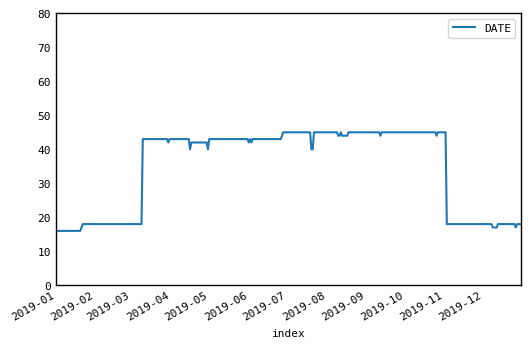

In [546]:
fig3=temp.plot()
fig3.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)])
fig3.set_ylim([0, 80])
plt.savefig('daylightsaving.png', dpi=1200)

In [ ]:
mta_data_4hourly[mta_data_4hourly.STATION='34 ST-PENN STA'].TIME

In [487]:
mta_data_4hourly[mta_data_4hourly.loc[:,'TIME'].isin(timeintervals)].STATION.value_counts().reset_index()

,index,STATION
0,34 ST-PENN STA,107565
1,23 ST,80205
2,34 ST-HERALD SQ,75534
3,CHAMBERS ST,75401
4,86 ST,74395
...,...,...
359,NEWARK C,4
360,NEWARK BM BW,3
361,PATH NEW WTC,2
362,THIRTY ST,2


In [455]:
def get_4hourly_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100,000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_data_4hourly["4HOURLY_ENTRIES"] = mta_data_4hourly.apply(get_4hourly_counts, axis=1, max_counter=20000)

KeyError: 'PREV_ENTRIES'

In [278]:
#mta_data_4hourly["DATE_TIME"]=mta_data_4hourly["DATE_TIME"].astype(str)

<ipython-input-278-60b74e63d577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_data_4hourly["DATE_TIME"]=mta_data_4hourly["DATE_TIME"].astype(str)


In [394]:
mta_data_4hourly.rename(columns={'4HOURLY_ENTRIES': 'FOURHOURLY_ENTRIES'},inplace=True)

C:\Users\Josh_Wang\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [395]:
#MTA audit time is inconsistent
mta_data_4hourly.TIME.value_counts().head(20)

04:00:00    799300
16:00:00    799161
08:00:00    799069
00:00:00    799002
20:00:00    798902
12:00:00    798892
01:00:00    441475
09:00:00    441455
21:00:00    441386
17:00:00    441374
05:00:00    441368
13:00:00    441327
07:00:00    308425
19:00:00    308324
15:00:00    308312
11:00:00    308252
03:00:00    308249
23:00:00    308025
10:00:00     30838
18:00:00     30836
Name: TIME, dtype: int64

In [396]:
#getting time intervals 12am, 4am, 8am, 12pm, 4pm, 8pm
timeintervals=mta_data_4hourly.TIME.value_counts().reset_index().iloc[:,0][:6].tolist()

In [397]:
mta_data_4hourly=mta_data_4hourly[mta_data_4hourly.loc[:,'TIME'].isin(timeintervals)]

In [398]:
#add weekday column
mta_data_4hourly['DAY']=pd.to_datetime(mta_data_4hourly.DATE_TIME).dt.day_name()

In [399]:
mta_data_4hourly=mta_data_4hourly.groupby(["TIME",'DAY','DATE_TIME']).FOURHOURLY_ENTRIES.sum().reset_index(name ='ENTRIES')

In [400]:
mta_data_4hourly.head()

,TIME,DAY,DATE_TIME,ENTRIES
0,00:00:00,Friday,2019-01-04,171836.0
1,00:00:00,Friday,2019-01-11,176791.0
2,00:00:00,Friday,2019-01-18,180111.0
3,00:00:00,Friday,2019-01-25,184411.0
4,00:00:00,Friday,2019-02-01,167841.0


In [401]:
#sanity check
#temp=mta_data_4hourly[(mta_data_4hourly['TIME']=='08:00:00')&(mta_data_4hourly['DAY'].isin(['Monday','Tuesday']))]

In [402]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [403]:
#temp

,TIME,DAY,DATE_TIME,ENTRIES
762,08:00:00,Monday,2019-01-07 08:00:00,300523.0
763,08:00:00,Monday,2019-01-14 08:00:00,288557.0
764,08:00:00,Monday,2019-01-28 08:00:00,275919.0
765,08:00:00,Monday,2019-02-04 08:00:00,334044.0
766,08:00:00,Monday,2019-02-11 08:00:00,295068.0
...,...,...,...,...
1009,08:00:00,Tuesday,2019-12-03 08:00:00,319244.0
1010,08:00:00,Tuesday,2019-12-10 08:00:00,322248.0
1011,08:00:00,Tuesday,2019-12-17 08:00:00,305838.0
1012,08:00:00,Tuesday,2019-12-24 08:00:00,162722.0


In [404]:
total_4hourly=mta_data_4hourly.groupby(["TIME",'DAY']).ENTRIES.mean().reset_index(name ='ENTRIES')

In [405]:
total_4hourly.sort_values(['TIME','DAY']).head()

,TIME,DAY,ENTRIES
0,00:00:00,Friday,342262.730769
1,00:00:00,Monday,171758.847826
2,00:00:00,Saturday,327627.250000
3,00:00:00,Sunday,242929.250000
4,00:00:00,Thursday,294718.160000


In [407]:
#https://stackoverflow.com/questions/53189216/sorting-pandas-dataframe-by-weekdays
#order week days
#from calendar import day_name
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_4hourly['DAY'] = pd.Categorical(total_4hourly['DAY'], categories=cats, ordered=True)

In [408]:
total_4hourly.dtypes

TIME         object
DAY        category
ENTRIES     float64
dtype: object

In [409]:
total_4hourly.head()

,TIME,DAY,ENTRIES
0,00:00:00,Friday,342262.730769
1,00:00:00,Monday,171758.847826
2,00:00:00,Saturday,327627.250000
3,00:00:00,Sunday,242929.250000
4,00:00:00,Thursday,294718.160000


In [410]:
total_4hourly = total_4hourly.sort_values(['DAY','TIME'])

<AxesSubplot:xlabel='TIME', ylabel='ENTRIES'>

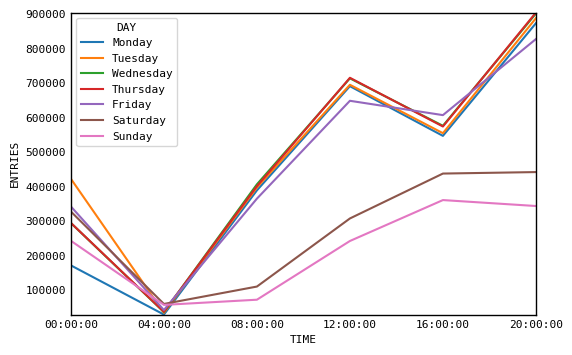

In [411]:
#sanity check
sns.lineplot(data=total_4hourly, x='TIME',y='ENTRIES', hue="DAY")

In [412]:
total_4hourly.head(10)

,TIME,DAY,ENTRIES
1,00:00:00,Monday,171758.847826
8,04:00:00,Monday,29355.695652
15,08:00:00,Monday,389029.891304
22,12:00:00,Monday,690703.304348
29,16:00:00,Monday,546820.326087
36,20:00:00,Monday,872965.869565
5,00:00:00,Tuesday,422405.000000
12,04:00:00,Tuesday,34516.673077
19,08:00:00,Tuesday,397396.288462
26,12:00:00,Tuesday,694702.211538


In [413]:
total_4hourly['DAY']=total_4hourly['DAY'].shift(1)

In [414]:
#replace NaN with "Sunday"
total_4hourly.iloc[0,1]='Sunday'

In [415]:
#change '00:00:00' to '24:00:00'
total_4hourly.loc[total_4hourly.iloc[:,0]=='00:00:00','TIME']='24:00:00'

In [416]:
dictfortimeinterval={"04:00:00":"12am-4am","08:00:00":"4am-8am","12:00:00":"8am-12pm","16:00:00":"12pm-4pm","20:00:00":"4pm-8pm","24:00:00":"8pm-12am"}

In [417]:
total_4hourly.replace({"TIME": dictfortimeinterval},inplace=True)

## Making weekly heatmap

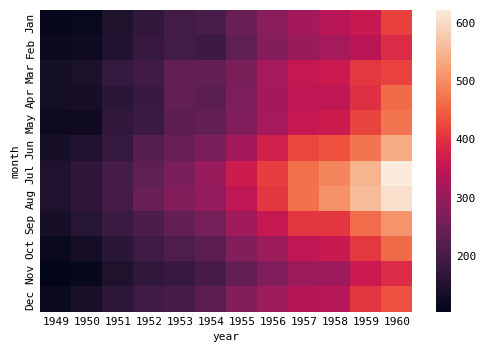

In [418]:
##Seaborn heatmap demo
import seaborn as sns
flights = sns.load_dataset("flights")
flightspiv = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flightspiv)

In [423]:
#save table for future
total_4hourly.to_csv('total_4hourly_holidaysremoved.csv', sep='\t',index=False)

In [420]:
total_4hourly_piv=total_4hourly.pivot("DAY", "TIME", "ENTRIES")


total_4hourly_piv = total_4hourly_piv[["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"]]
total_4hourly_piv.head()

TIME,12am-4am,4am-8am,8am-12pm,12pm-4pm,4pm-8pm,8pm-12am
DAY,,,,,,
Monday,29355.695652,389029.891304,690703.304348,546820.326087,872965.869565,422405.000000
Tuesday,34516.673077,397396.288462,694702.211538,554608.019231,887498.557692,294379.803922
Wednesday,36505.725490,406516.980392,713367.882353,576018.156863,900903.784314,294718.160000
Thursday,37401.380000,401317.280000,714988.180000,573907.920000,903776.300000,342262.730769
Friday,42597.403846,365057.461538,648389.692308,606875.519231,827094.019231,327627.250000


In [263]:
#total_4hourly_piv=total_4hourly_piv.reset_index()

In [265]:
#total_4hourly_piv

TIME,DAY,12am-4am,12pm-4pm,4am-8am,4pm-8pm,8am-12pm,8pm-12am
0,Monday,29589.519231,527426.615385,362486.673077,825001.730769,651195.365385,243081.660377
1,Tuesday,34833.188679,548659.188679,390832.452830,875139.169811,683822.245283,274435.442308
2,Wednesday,36245.884615,568702.769231,399503.365385,886993.307692,701727.961538,280186.807692
3,Thursday,37632.461538,564006.576923,389359.557692,880597.307692,696311.692308,294895.250000
4,Friday,42555.576923,606875.519231,365057.461538,827094.019231,648389.692308,327627.250000
5,Saturday,60153.980769,437684.980769,110508.384615,441968.346154,307694.980769,242929.250000
6,Sunday,57425.480769,360905.961538,72423.096154,343715.519231,242432.115385,170951.326923


In [253]:
#https://stackoverflow.com/questions/53189216/sorting-pandas-dataframe-by-weekdays
#order week days
#from calendar import day_name
#cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#total_4hourly_piv['DAY'] = pd.Categorical(total_4hourly_piv['DAY'], categories=cats, ordered=True)

In [254]:
#total_4hourly_piv = total_4hourly_piv.sort_values('DAY')

In [255]:
#total_4hourly_piv=total_4hourly_piv.set_index('DAY')

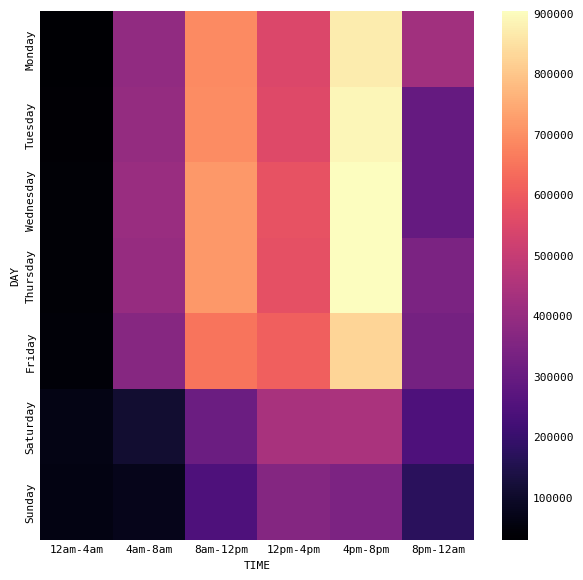

In [435]:
plt.figure(figsize = (7, 7))
ax = sns.heatmap(total_4hourly_piv, 
                 cmap='magma',
                #linewidths = 0.01
                )
plt.savefig('weeklyheatmap.png', dpi=1200)

In [531]:
total_4hourly['TIME','DAY']

KeyError: ('TIME', 'DAY')